<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/explore_database_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore database Palermo

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [0]:
#load data from pc
#train_dataset_path = '/home/leonardo/Scrivania/TESI_PA/database_training2.csv'
#test_dataset_path = '/home/leonardo/Scrivania/TESI_PA/database_nostro.csv'

In [0]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.columns

Index(['Histology', 'Survival.time (months)', 'OS', 'deadstatus.event',
       'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength',
       ...
       'SmallAreaEmphasis', 'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness', 'Overall.Stage'],
      dtype='object', length=112)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
df_train.head()

,Histology,Surv_time_months,OS,deadstatus.event,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,...,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness,Overall_Stage
0,adenocarcinoma,5,1_anno,1,51905.377962,66.288317,51847.748274,50.574214,0.649258,37.884620,0.821088,0.199752,63.135672,0.749090,10356.675894,41.525899,65.067279,55.325619,12.481889,1084.854684,5.949646,918.046673,5312.127441,0.122582,97.652454,0.050648,141.807349,0.124010,42.380287,163828.301666,0.000266,0.001208,33.190463,66.380925,4.331076,-475.448161,0.308299,0.994676,0.133643,8.029403,...,17.777521,5.650502,0.001166,17.478141,0.001372,0.192540,1.399893,2288.112500,3.749302,793.234742,6675.859117,0.776723,4220.221337,0.654950,0.003806,4.209293,1049.544424,0.560736,34.869500,42116.076135,0.060025,0.517739,1145.238698,132.775769,42183.224231,540.316964,0.122035,36.510775,4.877236e+07,751.520796,0.747563,0.002453,5.741322,0.001663,0.000357,928.016789,1.153806,0.020920,1.306338,I
1,adenocarcinoma,18,2_anni,1,13432.502747,58.057539,13312.697411,48.354803,0.572236,18.135097,0.546338,0.356577,40.146103,0.375042,4747.006589,26.418066,32.760898,56.652510,60.615944,1076.589137,7.130906,595.667519,351.846858,0.307871,239.202712,0.126873,32.011715,0.031426,12.612334,41890.348882,0.001812,0.003214,33.522040,67.044080,7.487967,-2829.110940,0.055759,0.985695,0.015596,38.337756,...,5.224099,-91.310969,0.003404,65.432452,0.003524,0.064158,0.230922,262.139314,1.567042,926.829706,3237.676584,0.908183,1777.017297,0.869059,0.004164,5.072184,1044.275778,0.790377,84.615342,598.216508,0.033349,0.543736,843.878866,51.757732,607.367912,543.633876,0.330564,0.465530,8.137725e+05,763.567010,0.764879,0.006307,6.451087,0.004959,0.001680,2944.805484,2.266070,0.146173,0.253533,I
2,adenocarcinoma,31,3_anni,0,25843.872675,52.918217,25724.437234,39.406474,0.675497,28.487740,0.891907,0.242519,46.415213,0.722920,6238.658603,35.146929,47.180420,46.322906,55.064124,1131.900166,6.932158,844.783490,1023.136953,0.253452,192.059998,0.093605,57.855402,0.045979,22.286238,79266.271357,0.000812,0.001864,34.046184,68.092368,6.796695,-3133.512010,0.106695,0.984515,0.033042,32.375097,...,5.387644,-67.724986,0.001973,61.733697,0.002096,0.085594,0.426431,626.125860,1.968083,906.575851,5266.417163,0.870954,2393.005796,0.809077,0.002930,4.968901,1079.567623,0.718481,68.928494,3157.415098,0.036760,0.531612,1319.991542,91.276279,3170.626259,525.709823,0.275125,2.306913,4.377395e+06,732.877970,0.757392,0.003456,6.294554,0.002520,0.000745,2146.780339,1.238883,0.152919,0.611772,I
3,adenocarcinoma,38,4_anni,1,22152.709032,46.635312,22099.0167

In [0]:
df_train.columns

Index(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event',
       'VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength',
       ...
       'SmallAreaEmphasis', 'LowGrayLevelZoneEmphasis', 'ZoneEntropy',
       'SmallAreaLowGrayLevelEmphasis', 'Coarseness', 'Complexity', 'Strength',
       'Contrast.1', 'Busyness', 'Overall_Stage'],
      dtype='object', length=112)

In [0]:
df_train.Histology.unique()


array(['adenocarcinoma', 'large cell', 'squamous cell carcinoma'],
      dtype=object)

In [0]:
df_test.Histology.unique()

array([nan, 'squamous cell carcinoma', 'large cell', 'adenocarcinoma'],
      dtype=object)

## Boxplot survival time grouped by histology

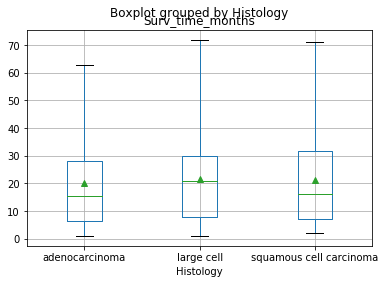

In [0]:
boxplot = df_train.boxplot(column=['Surv_time_months'], by='Histology', showmeans=True, whis='range')

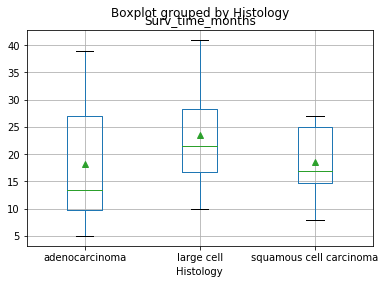

In [0]:
boxplot = df_test.boxplot(column=['Surv_time_months'], by='Histology', showmeans=True, whis='range')

## Boxplot survival time grouped by Overall Stage

In [0]:
df_train.Overall_Stage

0         I
1         I
2         I
3         I
4      IIIa
       ... 
126    IIIb
127    IIIb
128    IIIb
129    IIIb
130    IIIb
Name: Overall_Stage, Length: 131, dtype: object

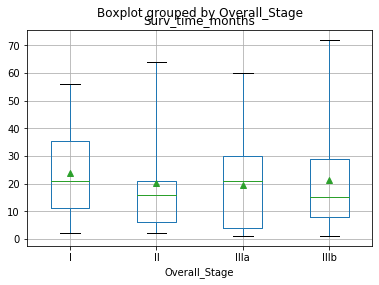

In [0]:
boxplot = df_train.boxplot(column=['Surv_time_months'], by='Overall_Stage', showmeans=True, whis='range')

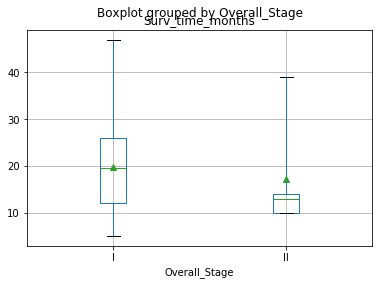

In [0]:
boxplot = df_test.boxplot(column=['Surv_time_months'], by='Overall_Stage', showmeans=True, whis='range')

# Correlation

In [0]:
import seaborn as sns

Calcolo del coefficiente di correlazione di Pearson

In [0]:
a=df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
a.shape

(131, 107)

In [0]:
mean = a.mean(axis=0)
a_stand = a - mean
std = a.std(axis=0)
a_stand /= std

In [0]:
a_stand

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness
0,-0.326999,-0.324600,-0.325959,-0.421079,0.561642,0.263757,0.500573,-0.552050,0.037308,1.106313,-0.347948,-0.165769,-0.025317,-0.414145,-1.335743,-0.813071,-2.824541,-0.634351,0.334305,-1.126107,-1.928055,-1.113628,2.934736,-0.120940,2.821184,1.495617,-0.540674,-0.378705,-0.684333,-0.684333,-2.317268,1.007081,4.555993,0.632496,4.589561,-1.113551,-1.678802,0.969446,-1.314485,0.744786,...,1.260758,1.158829,0.991254,-0.477563,-1.395013,-0.417375,2.340442,3.134412,-0.032854,2.945550,-1.255217,-0.560125,-2.008450,1.078044,-2.350651,-0.194420,-1.826327,-0.808912,-1.870073,-1.782876,0.592133,2.517908,0.538394,-0.611232,-0.280137,0.592947,-0.792517,-1.116086,0.324868,-0.330176,-0.872779,0.569674,-0.535195,-2.494285,-0.525241,-0.384378,-1.431675,-0.431619,-0.748803,0.428486
1,-0.785959,-0.588352,-0.785827,-0.504174,-0.209052,-1.104920,-1.321997,0.832807,-0.898101,-1.305701,-0.834556,-1.014615,-1.143253,-0.369513,-0.203455,-0.838653,0.322728,-0.778917,-0.715397,0.610489,0.145149,0.265639,-0.642557,-0.217092,-0.449308,-0.769577,0.346492,-0.093280,-0.611749,-0.611749,0.344859,0.477566,-0.515063,-0.012260,-0.594141,-0.026171,0.417892,-0.317860,0.063599,-0.218600,...,-0.167729,-0.530368,-0.077012,0.030173,-0.226248,-0.037642,-0.643090,-0.568272,-0.725264,-0.614104,-0.732080,-0.788133,0.680449,-0.803587,0.659974,-0.177157,0.297810,-0.825228,0.657376,-0.387514,-0.571869,-0.235669,1.102310,-0.750339,-0.768952,-0.572074,-0.775330,0.543521,-0.327762,-0.330961,-0.829963,1.090705,0.683129,-0.468298,0.643920,0.167390,-0.254404,0.205362,-0.158492,-0.876045
2,-0.637898,-0.753039,-0.637708,-0.839201,0.824200,-0.387464,0.970356,-0.174393,-0.643021,0.937562,-0.705164,-0.524177,-0.644277,-0.716966,-0.334054,-0.667465,-0.206805,-0.667205,-0.573338,0.100455,-0.545323,-0.336336,0.199466,-0.201979,0.613527,-0.075259,-0.227705,-0.285335,-0.497012,-0.497012,-0.238073,0.409084,0.507744,-0.097035,0.171963,-0.240094,0.034290,0.193277,-0.114283,-0.167127,...,-0.016895,-0.508361,0.182845,-0.294445,-0.316396,-0.289695,-0.144933,0.051001,-0.600866,0.040065,-0.811391,-0.653594,-0.081030,-0.329184,-0.183435,-0.236599,0.043563,-0.715940,-0.133909,-0.827527,-0.500119,0.116467,0.839308,-0.530567,-0.530520,-0.500248,-0.868207,0.102297,-0.294422,-0.330903,-0.939040,0.865427,-0.218079,-0.915112,-0.221102,-0.222361,-0.720239,-0.382896,-0.126698,-0.432151
3,-0.681932,-0.954372,-0.680973,-0.867883,1.403699,-0.412298,0.056476,-0.

In [0]:
a_stand.corr()

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness
VoxelVolume,1.000000,0.821982,0.999999,0.785606,-0.329751,0.898913,0.020392,-0.679146,0.832976,0.072277,0.950756,0.889105,0.838170,0.837324,-0.176830,0.528070,0.033228,0.939428,0.923283,-0.572156,-0.317799,-0.486348,0.369668,0.144763,0.216950,0.432934,-0.362273,-0.015689,0.493080,0.493080,-0.356995,-0.200703,0.205100,0.524585,0.270697,-0.436992,-0.487864,0.510222,-0.388195,0.577134,...,0.323978,0.328833,0.413992,-0.111564,-0.142230,-0.052167,0.418276,0.298776,0.938199,0.350780,0.469435,0.973643,-0.490008,0.469550,-0.458102,0.118459,-0.254205,0.530056,-0.501210,0.248150,0.799097,0.075534,-0.411886,0.899479,0.922172,0.799043,0.475936,-0.572976,0.523293,0.611567,0.497011,-0.412217,-0.368620,0.506717,-0.381946,-0.401634,0.277302,-0.510155,-0.458069,0.937894
Maximum3DDiameter,0.821982,1.000000,0.821800,0.964760,-0.678628,0.812696,-0.271438,-0.683336,0.917765,-0.271877,0.911623,0.901223,0.940584,0.958797,-0.220656,0.639461,0.133962,0.786661,0.741102,-0.654213,-0.251020,-0.605156,0.395214,0.129414,0.263112,0.460671,-0.531704,-0.054131,0.608983,0.608983,-0.375524,-0.180379,0.249756,0.670078,0.298131,-0.525327,-0.549153,0.599396,-0.433522,0.695066,...,0.398349,0.371992,0.526980,-0.183269,-0.180156,-0.108437,0.445523,0.317060,0.755681,0.371774,0.594074,0.812268,-0.527681,0.517503,-0.498173,0.073990,-0.270332,0.641334,-0.547216,0.265182,0.621154,0.068929,-0.434710,0.782626,0.794181,0.621175,0.575123,-0.657133,0.372469,0.461945,0.595651,-0.428361,-0.533330,0.573314,-0.555928,-0.586992,0.257297,-0.642559,-0.592542,0.810919
MeshVolume,0.999999,0.821800,1.000000,0.785457,-0.329524,0.898705,0.020542,-0.678962,0.832789,0.072340,0.950769,0.888978,0.838067,0.837236,-0.176905,0.527940,0.032935,0.939282,0.923458,-0.572020,-0.317906,-0.486162,0.369643,0.144589,0.216857,0.432929,-0.362038,-0.015775,0.492963,0.492963,-0.357052,-0.200464,0.205177,0.524315,0.270745,-0.436857,-0.487829,0.510158,-0.388145,0.576903,...,0.324013,0.328922,0.413856,-0.111583,-0.142320,-0.052227,0.418311,0.298709,0.938334,0.350732,0.469275,0.973528,-0.489990,0.469492,-0.458066,0.118297,-0.254306,0.529929,-0.501173,0.248039,0.799463,0.075682,-0.411663,0.899224,0.922040,0.799408,0.475816,-0.572841,0.523224,0.612063,0.496873,-0.411994,-0.368391,0.506398,-0.381685,-0.401370,0.277025,-0.509976,-0.457835,0.937881
MajorAxisLength,0.785606,0.964760,0.785457,1.000000,-0.694906,0.740991,-0.405218,-0.609701,0.865958,-0.395222,0.888151,0.8

In [0]:
b=df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
mean = b.mean(axis=0)
b_stand = b - mean
std = b.std(axis=0)
b_stand /= std

In [0]:
b_stand.corr()

,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,Idn,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness
VoxelVolume,1.000000,0.832150,0.999999,0.772790,-0.026973,0.898585,-0.026232,-0.674293,0.847133,-0.011949,0.956395,0.904609,0.859533,0.845367,0.039323,0.445351,0.471074,0.917174,0.922014,-0.458634,-0.166511,-0.421095,0.444538,0.115145,0.420305,0.596791,-0.387049,-0.360264,0.402535,0.402535,-0.133123,-0.321224,0.259981,0.535395,0.191754,-0.253645,-0.310411,0.354390,-0.183318,0.566465,...,0.099790,0.177698,0.230512,-0.373381,0.116613,-0.367876,0.132198,0.488962,0.932558,0.461190,0.333150,0.974114,-0.406913,0.618176,-0.449488,-0.247236,0.273796,0.438972,-0.415452,0.398528,0.806805,-0.240787,-0.398823,0.836695,0.938663,0.806159,0.329359,-0.449761,0.660406,0.842977,0.393077,-0.391531,-0.389582,0.690677,-0.394299,-0.297500,0.449391,-0.331087,-0.372888,0.742542
Maximum3DDiameter,0.832150,1.000000,0.831531,0.977372,-0.473582,0.815658,-0.385520,-0.743839,0.920597,-0.410287,0.944157,0.916222,0.960730,0.954900,0.112700,0.513659,0.584957,0.843548,0.757146,-0.419874,-0.047244,-0.425442,0.475724,0.115045,0.512594,0.650602,-0.548812,-0.493851,0.480752,0.480752,-0.059112,-0.314523,0.318873,0.553464,0.215309,-0.175027,-0.254135,0.259224,-0.097237,0.566609,...,0.040821,0.189589,0.154486,-0.512180,0.183673,-0.506017,0.111051,0.506861,0.755496,0.472046,0.402294,0.826855,-0.396298,0.654078,-0.461056,-0.366550,0.356771,0.501048,-0.405869,0.406905,0.634012,-0.270826,-0.300028,0.835065,0.895683,0.633555,0.428969,-0.413642,0.497271,0.683364,0.471586,-0.287506,-0.567967,0.727569,-0.568026,-0.481513,0.459052,-0.521819,-0.362208,0.709268
MeshVolume,0.999999,0.831531,1.000000,0.772134,-0.026067,0.898391,-0.025678,-0.673887,0.846637,-0.011262,0.956053,0.904203,0.859002,0.844819,0.039263,0.445074,0.470747,0.917052,0.922022,-0.458506,-0.166630,-0.420891,0.444245,0.115074,0.419872,0.596428,-0.386599,-0.359863,0.402237,0.402237,-0.133123,-0.321164,0.259689,0.535136,0.191577,-0.253640,-0.310354,0.354427,-0.183370,0.566221,...,0.099814,0.177587,0.230516,-0.372972,0.116535,-0.367469,0.132160,0.488688,0.932585,0.460943,0.332933,0.974109,-0.406737,0.617859,-0.449241,-0.246923,0.273586,0.438715,-0.415271,0.398483,0.806859,-0.240701,-0.398824,0.836438,0.938411,0.806212,0.329089,-0.449638,0.660461,0.843027,0.392815,-0.391547,-0.389099,0.690421,-0.393813,-0.297088,0.449292,-0.330649,-0.372723,0.742281
MajorAxisLength,0.772790,0.977372,0.772134,1.000000,-0.503214,0.757266,-0.515706,-0.709578,0.858436,-0.501761,0.894127,0.

#Shapiro Test

Perform the Shapiro-Wilk test for normality: the Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [0]:
from scipy.stats import shapiro

In [0]:
p_value_list_train=[]
for column in a_stand.columns:
  stat, p_value = shapiro(a_stand[column])
  p_value_list_train.append(p_value)

In [0]:
min(p_value_list_train)

2.497328837638728e-23

In [0]:
p_value_list_test=[]
for column in b_stand.columns:
  stat, p_value = shapiro(b_stand[column])
  p_value_list_test.append(p_value)

In [0]:
min(p_value_list_test)

1.6231808648917156e-12

Siccome p_value > 0.5, si può accettare l'ipotesi nulla del Test di Shapiro che afferma che i dati sono distribuiti normalmente.
Le features sono distribuite normalmente.
NON È VERO, ALCUNI HANNO p_value < 0.5, QUINDI NON SONO DISTRIBUITE NORMALMENTE QUINDI NON SI PUÒ EFFETTUARE IL T-test.

In [0]:
c=np.arange(0, 1, 0.01)

In [0]:
p, s = shapiro(c)

In [0]:
s

0.0017219752771779895

#T-test

Rispetto alla condizione di normalità la distribuzione t è robusta. Con tale termine tecnico si intende affermare  che  rimane  approssimativamente  valida,  anche  quando  le  distribuzioni  di  dati  non  rispettano esattamente la condizione dalla normalità.

In [0]:
import scipy

T-test su dati non standardizzati

In [0]:
t_test_list=[]
for column in a.columns:
   stat, p_value = scipy.stats.ttest_ind(a[column], b[column])
   t_test_list.append(p_value)


In [0]:
max(t_test_list)

0.9648879165383433

T-test su dati standardizzati

In [0]:
t_test_list_stand=[]
for column in a_stand.columns:
   stat, p_value = scipy.stats.ttest_ind(a_stand[column], b_stand[column])
   t_test_list_stand.append(p_value)

In [0]:
t_test_list_stand

[0.9999999999999989,
 0.9999999999999974,
 0.9999999999999978,
 0.9999999999999913,
 0.9999999999999948,
 0.999999999999994,
 0.9999999999999961,
 0.9999999999999993,
 1.0,
 0.9999999999999978,
 0.9999999999999988,
 0.9999999999999964,
 0.999999999999997,
 0.9999999999999971,
 0.9999999999999987,
 0.9999999999999943,
 0.9999999999999947,
 0.9999999999999968,
 0.9999999999999994,
 0.9999999999999963,
 0.9999999999999992,
 0.9999999999999996,
 0.9999999999999981,
 0.9999999999999997,
 0.9999999999999996,
 0.9999999999999971,
 0.9999999999999969,
 0.9999999999999991,
 0.9999999999999923,
 0.9999999999999923,
 0.9999999999999878,
 0.9999999999999988,
 0.9999999999999962,
 0.9999999999999127,
 0.9999999999999967,
 1.0,
 0.9999999999999992,
 0.9999999999999876,
 0.9999999999999984,
 0.9999999999999893,
 0.9999999999999969,
 0.9999999999999825,
 0.99999999999999,
 0.9999999999999927,
 0.9999999999999886,
 0.9999999999999997,
 0.999999999999998,
 0.9999999999999765,
 0.9999999999999876,
 0.999

##Prova di standardizzazione usando Standar Scaler di scikitlearn

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(a)
a_stand_2 = scaler.transform(a)

In [0]:
a_stand_2

array([[-0.32825417, -0.32584636, -0.32721001, ..., -0.4332755 ,
        -0.7516774 ,  0.43013088],
       [-0.78897603, -0.59061051, -0.78884392, ...,  0.20615066,
        -0.1591008 , -0.87940752],
       [-0.64034692, -0.75593003, -0.64015643, ..., -0.38436574,
        -0.12718394, -0.43380958],
       ...,
       [ 1.29004196,  0.69210429,  1.2889664 , ..., -0.5417071 ,
        -0.77238378,  0.77653302],
       [-0.87305336, -1.01499517, -0.87257426, ...,  0.28744084,
         1.47597206, -0.88415935],
       [-0.7577632 , -0.73939529, -0.75782686, ...,  0.77639539,
        -0.05956651, -0.8761473 ]])

In [0]:
scaler = StandardScaler()
scaler.fit(b)
b_stand_2 = scaler.transform(b)

In [0]:
t_test_list_stand=[]
for column in a_stand_2.columns:
   stat, p_value = scipy.stats.ttest_ind(a_stand_2[column], b_stand_2[column])
   t_test_list_stand.append(p_value)

AttributeError: ignored

#Casi per istologia

##Train set

In [0]:
df_train.Histology.unique()

In [0]:
list(df_train.Histology).count('adenocarcinoma')

In [0]:
list(df_train.Histology).count('large cell')

In [0]:
list(df_train.Histology).count('squamous cell carcinoma')

##Test set

In [0]:
df_test.Histology.unique()

In [0]:
list(df_test.Histology).count('adenocarcinoma')

In [0]:
list(df_test.Histology).count('large cell')

In [0]:
list(df_test.Histology).count('squamous cell carcinoma')

In [0]:
len(list(df_test.Histology))

In [0]:
47-10-20-4

#Confronto di medie e stdev per tutte le features tra dataset di train e datset di test 

In [0]:
df_train

In [0]:
train_data = df_train.drop(['Histology', 'Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Overall_Stage'], axis=1)

In [0]:
mean_train_data = train_data.mean()

In [0]:
mean_train_data

In [0]:
std_train_data = train_data.std()

In [0]:
mean_test_data = test_data.mean()

In [0]:
std_test_data = test_data.std()

In [0]:
my_dict = {'mean_train_data': mean_train_data , 'std_train_data': std_train_data, 
           'mean_test_data': mean_test_data, 'std_test_data': std_test_data}

In [0]:
result = pd.DataFrame.from_dict(my_dict)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [0]:
result

#Visualize using PCA

In [0]:
from sklearn.decomposition import PCA
import seaborn as sns

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit(train_data)
train_data_pca = pca.transform(train_data)

In [0]:
train_data_pca.shape

(131, 3)

In [0]:
type(pca_result)

sklearn.decomposition._pca.PCA

In [0]:
df = pd.DataFrame(train_data_pca, columns=['pca_one', 'pca_two', 'pca_three'])

In [0]:
df

,pca_one,pca_two,pca_three
0,-1.618223e+11,-2.633645e+10,-1.273461e+09
1,-1.616051e+11,-2.637595e+10,-1.197462e+09
2,-1.612193e+11,-2.635729e+10,-1.062122e+09
3,-1.605616e+11,-2.633443e+10,-8.311534e+08
4,-1.557765e+11,-2.613581e+10,8.496264e+08
...,...,...,...
126,6.298283e+11,3.816502e+09,9.513062e+07
127,-1.577570e+11,-2.620880e+10,1.540692e+08
128,-1.626326e+11,9.910106e+10,-2.523428e+08
129,6.378474e+11,4.073847e+09,1.103117e+08


In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.60542860e-01 3.94202123e-02 3.69276411e-05]


La prima componente ha il 96% della varianza dell'intero dataset??

In [0]:
pca_bis=PCA(0.95)
pca_result_bis = pca_bis.fit(train_data)
train_data_pca_bis =  pca_bis.transform(train_data)

In [0]:
train_data_pca_bis.shape

(131, 1)

Qualcosa non torna, nelle prove fatte, imponendo di conservare il 95% della varianza, l'algoritmo selezionava 9 features. Cioè 9 componenti principali erano necessarie per esprimere il 95% della varianza del dataset. Ora solo la prima componente esprime il 96%. L'UNICA DIFFERENZA È CHE IN QUESTO CASO NON È STATO FATTO LO Z-SCORE.
DOPO PROVO A FARE LE STESSE COSE CON I DATI STANDARDIZZATI.

Una sola feature conserva il 95% della varianza.

##Scatterplot

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

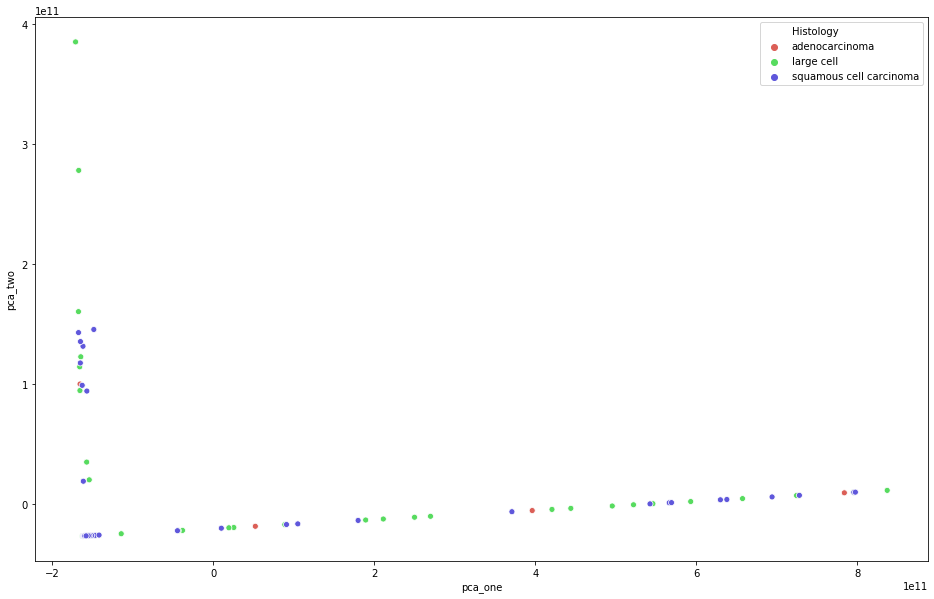

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.pca_one, y=df.pca_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Scatterplot 3D

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

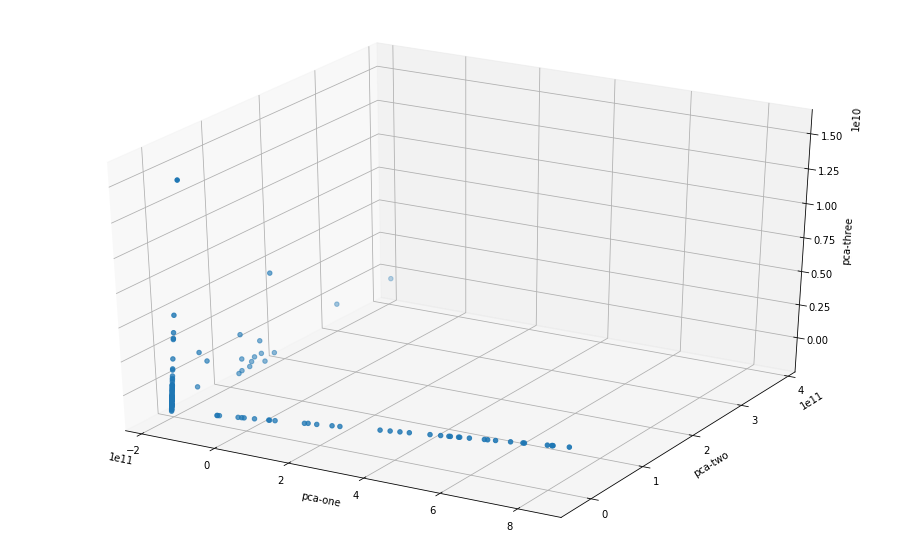

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=df.pca_one, ys=df.pca_two, zs=df.pca_three, cmap='tab3')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#Visualize using t-SNE

 Contrary to PCA it is not a mathematical technique but a probablistic one

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE:
**It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is very high.** 

##t-SNE senza applicare prima PCA

> Indented block



In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 131 samples in 0.001s...
[t-SNE] Computed neighbors for 131 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 131 / 131
[t-SNE] Mean sigma: 1278640352.633895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.636749
[t-SNE] KL divergence after 1000 iterations: 0.050260


In [0]:
tsne_result.shape

(131, 2)

In [0]:
df_tsne_2D = pd.DataFrame(tsne_result, columns=['tnse_2D_one', 'tnse_2D_two'])

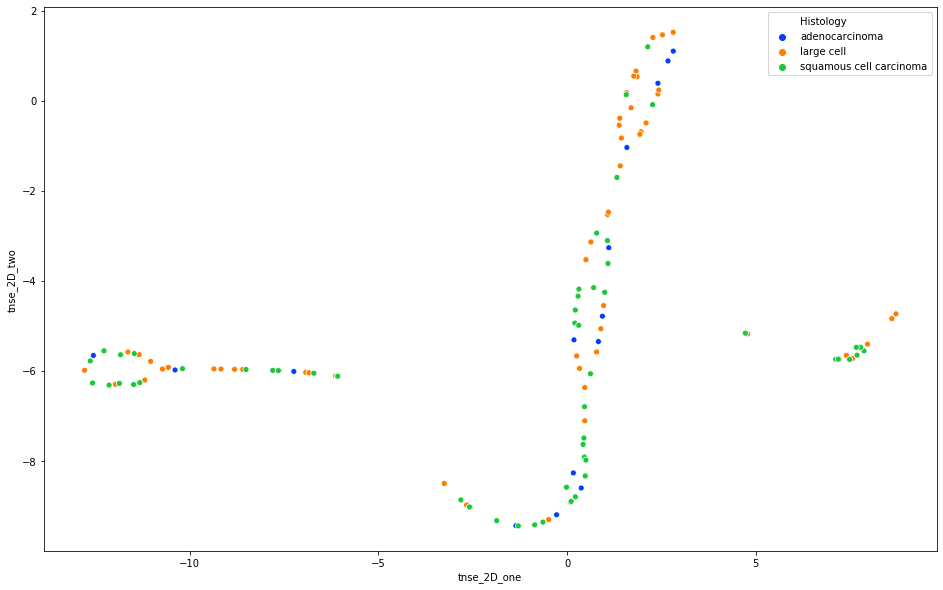

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D.tnse_2D_one, y=df_tsne_2D.tnse_2D_two, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

##t-SNE applicando prima PCA


In [0]:
pca_50 = PCA(n_components=50)
pca_result = pca_50.fit(train_data)
train_data_pca_50 = pca.transform(train_data)

In [0]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999999999999998


Le prime 50 componenti esprimono in pratica il 100% della varianza del dataset. Sappiamo che in realtà ne sono sufficinti molte meno per ottenere quella copertura.

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data_pca_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 131 samples in 0.000s...
[t-SNE] Computed neighbors for 131 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 131 / 131
[t-SNE] Mean sigma: 1278640352.633895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.067905
[t-SNE] KL divergence after 800 iterations: 0.077500


In [0]:
df_tsne_2D_pca = pd.DataFrame(tsne_result, columns=['tnse_pca_2D_one', 'tnse_pca_2D_two'])

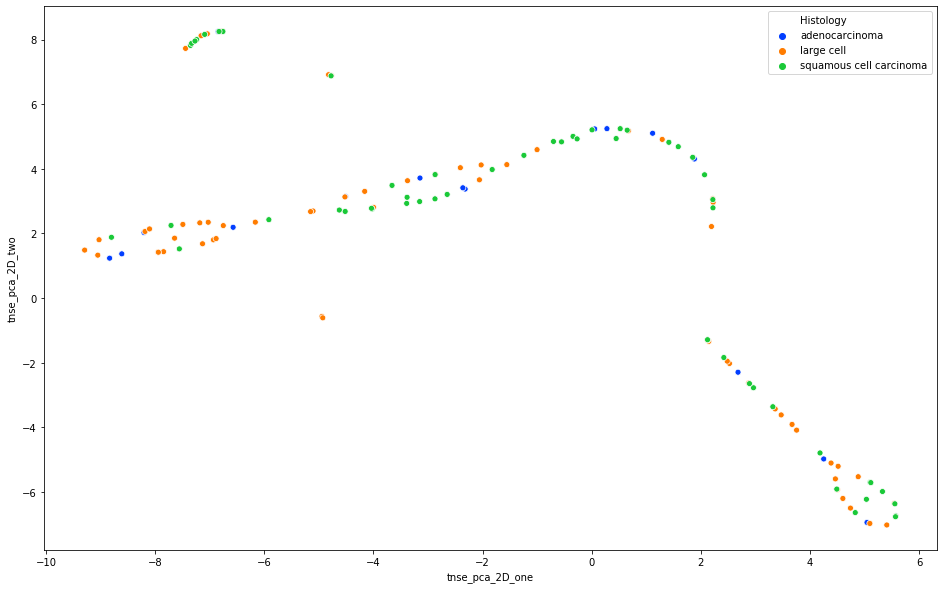

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_pca.tnse_pca_2D_one, y=df_tsne_2D_pca.tnse_pca_2D_two, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

#Visualize standardizzando prima i dati

##Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

In [0]:
train_data_stand.shape

(131, 107)

##Visualize using PCA

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit(train_data_stand)
train_data_pca_stand = pca.transform(train_data_stand)

In [0]:
train_data_pca_stand.shape

(131, 3)

In [0]:
type(pca_result)

sklearn.decomposition._pca.PCA

In [0]:
df = pd.DataFrame(train_data_pca_stand, columns=['pca_one_stand', 'pca_two_stand', 'pca_three_stand'])

In [0]:
df

,pca_one_stand,pca_two_stand,pca_three_stand
0,-8.293950,-8.985299,7.155630
1,4.155498,-3.128055,-0.892829
2,1.229538,-3.548896,0.991406
3,6.167102,-0.087931,-0.485529
4,-0.199071,2.608590,-2.846997
...,...,...,...
126,-7.909836,-4.012076,0.495004
127,-0.403325,0.994890,2.735019
128,-8.082463,1.372783,-1.028126
129,12.749291,-0.689201,-2.078309


In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.45585165 0.17163118 0.08423003]


La prima componente ha il 45% della varianza dell'intero dataset



In [0]:
pca_bis=PCA(n_components=0.90, svd_solver='full')
pca_result_bis = pca_bis.fit(train_data_stand)
train_data_pca_bis_stand =  pca_bis.transform(train_data_stand)

In [0]:
train_data_pca_bis_stand.shape

(131, 9)

TORNA! Imponendo di conservare il 90% della varianza, l'algoritmo seleziona 9 features. Cioè 9 componenti principali erano necessarie per esprimere il 90% della varianza del dataset. 
L'UNICA DIFFERENZA È CHE IN QUESTO CASO NON È STATO FATTO LO Z-SCORE.
DOPO PROVO A FARE LE STESSE COSE CON I DATI STANDARDIZZATI.

##Scatterplot

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

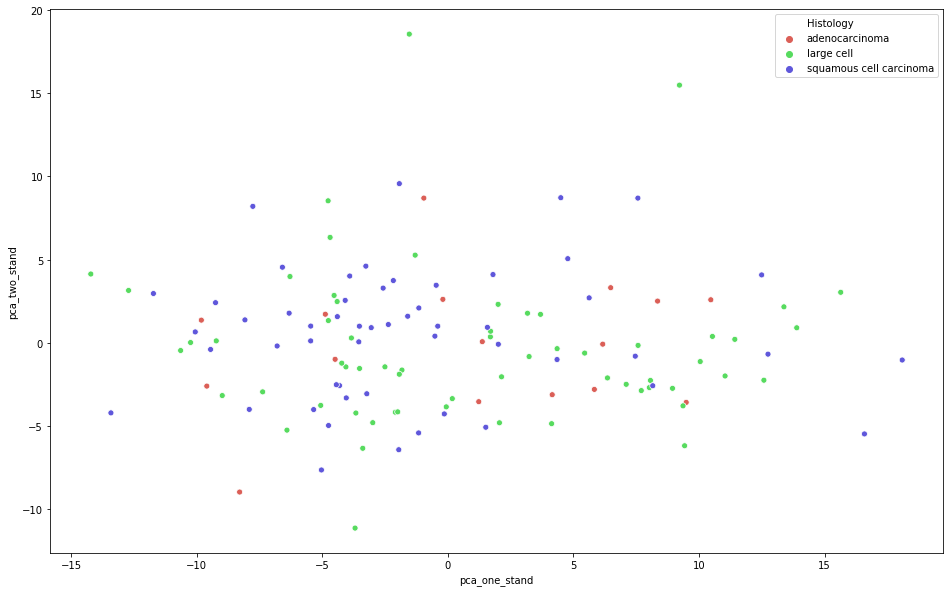

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.pca_one_stand, y=df.pca_two_stand, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Scatterplot 3D

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

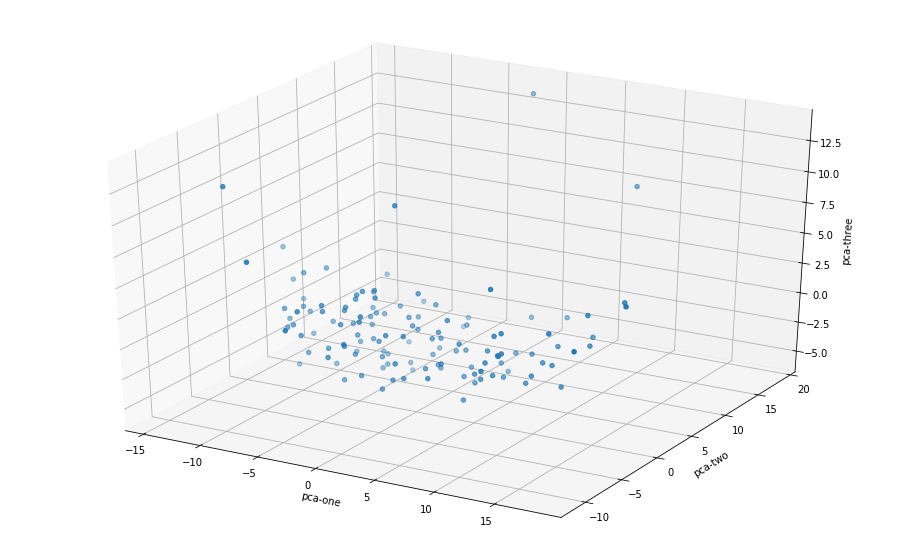

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=df.pca_one_stand, ys=df.pca_two_stand, zs=df.pca_three_stand, cmap='tab3')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

##Visualize using t-SNE

###t-SNE senza applicare prima PCA su dati standardizzati



In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result_stand = tsne.fit_transform(train_data_stand)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 131 samples in 0.000s...
[t-SNE] Computed neighbors for 131 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 131 / 131
[t-SNE] Mean sigma: 4.236728
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.873604
[t-SNE] KL divergence after 900 iterations: 0.360719


In [0]:
tsne_result_stand.shape

(131, 2)

In [0]:
df_tsne_2D_stand = pd.DataFrame(tsne_result_stand, columns=['tnse_2D_one_stand', 'tnse_2D_two_stand'])

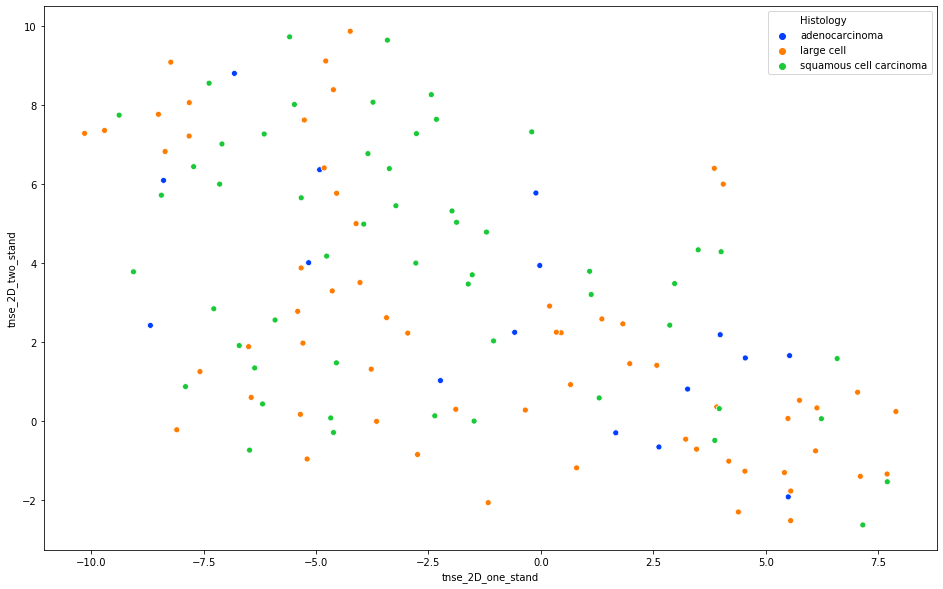

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_stand.tnse_2D_one_stand, y=df_tsne_2D_stand.tnse_2D_two_stand, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")

###t-SNE applicando prima PCA ai dati standardizzati


In [0]:
pca_50_stand = PCA(n_components=50)
pca_result = pca_50_stand.fit(train_data_stand)
train_data_pca_50_stand = pca_50_stand.transform(train_data_stand)

In [0]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9993182750729327


Le prime 50 componenti esprimono in pratica il 100% della varianza del dataset. Sappiamo che in realtà ne sono sufficinti molte meno per ottenere quella copertura.

In [0]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(train_data_pca_50_stand)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 131 samples in 0.000s...
[t-SNE] Computed neighbors for 131 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 131 / 131
[t-SNE] Mean sigma: 4.235984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.623268
[t-SNE] KL divergence after 800 iterations: 0.408851


In [0]:
df_tsne_2D_pca_stand = pd.DataFrame(tsne_result, columns=['tnse_pca_2D_one_stand', 'tnse_pca_2D_two_stand'])

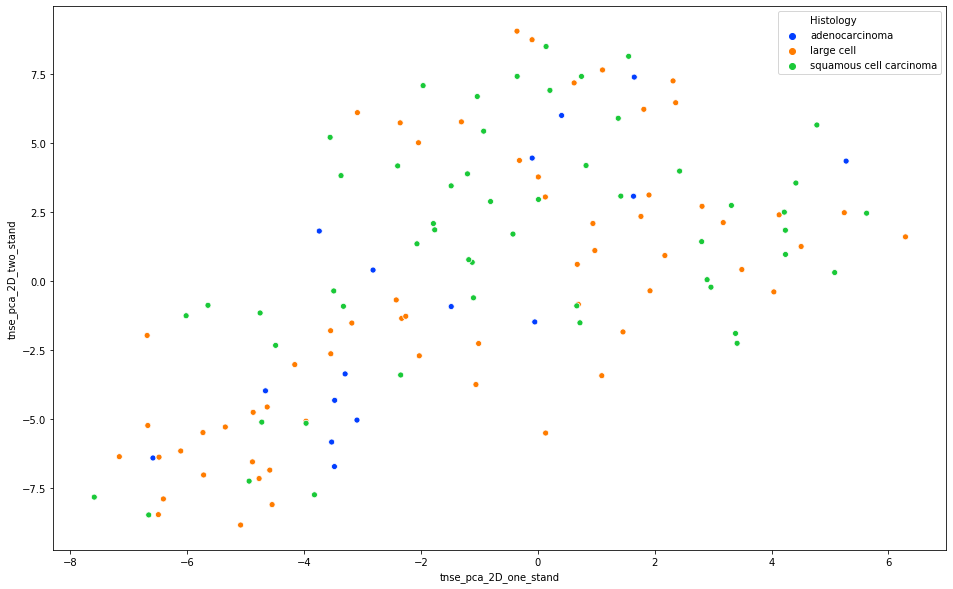

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=df_tsne_2D_pca_stand.tnse_pca_2D_one_stand, y=df_tsne_2D_pca_stand.tnse_pca_2D_two_stand, hue=train_labels,
    palette=sns.color_palette("bright", 3), legend="full")